# Version 1.2
Contact: น้องซี

# Installing Requirements + Setup
Goal of this Hackathon: **Classify digits (0-9) from a diverse dataset of handwritten, printed, and billboard text**

In [1]:
!pip install datasets transformers torch albumentations -q
!sudo apt install zstd -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 987.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 7.5 MB/s eta 0:00:00
Reading package lists...
Building 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset
https://drive.google.com/drive/folders/1s51ff8PCpqPkum9bgGQPcHV6So2vlDOx?usp=share_link

In [4]:
# !cp -r /content/drive/MyDrive/Signal/image_heatmap ./
!cp -r /content/drive/MyDrive/SuperAI/Signal/image_Research ./

In [4]:
!pip install pillow==9.2.0 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 33.6 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [ ]:
from huggingface_hub import notebook_login
notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


# Preprocessing Dataset + Augmentation


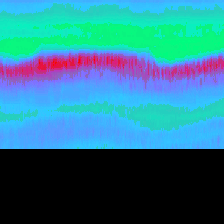

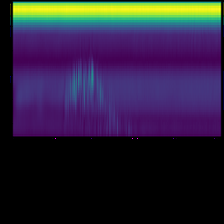

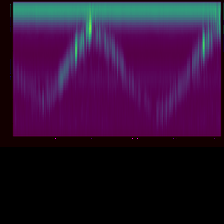

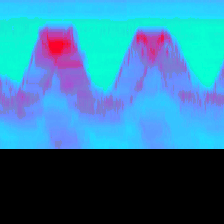

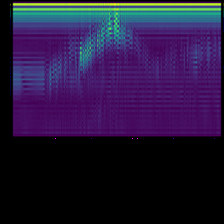

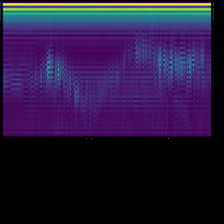

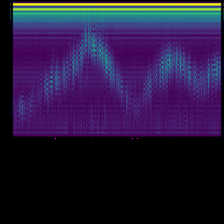

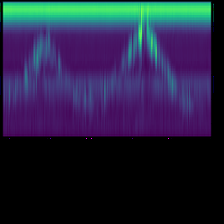

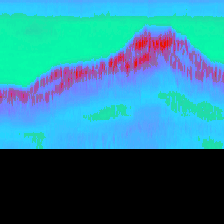

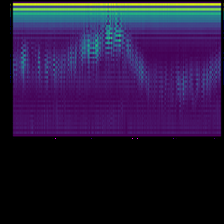

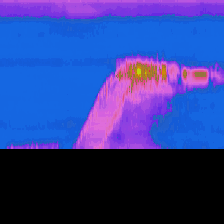

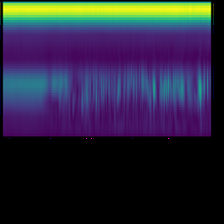

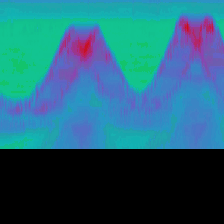

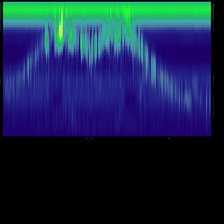

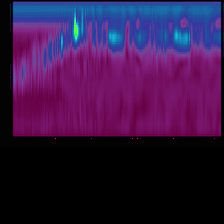

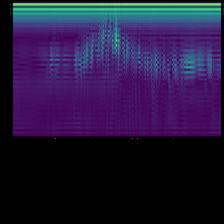

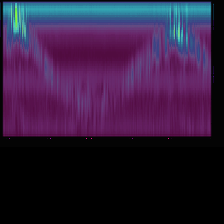

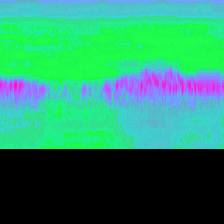

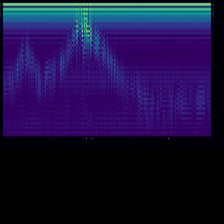

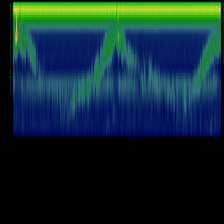

In [5]:
import glob
import random
from PIL import Image, ImageOps
import albumentations as A
import numpy as np

import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy import signal
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

files = glob.glob("/content/image_Research/**/*.png", recursive=True)

augment = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RGBShift(p=0.3),
    A.ColorJitter(p=0.25)
])

size = 224

fs = 100
lowcut = 20
highcut = 30


for _ in range(20):
    # Test Transformations
    choice = random.choice(files)
    img = Image.open(choice)
    img = ImageOps.contain(img, (size, size), Image.Resampling.LANCZOS).convert("RGB")
    img = ImageOps.autocontrast(img)
    img = Image.fromarray(augment(image=np.array(img))["image"])
    img = ImageOps.pad(img, (size, size), centering=(0,0))
    
    # b, a = signal.butter(2, [lowcut / (0.5* fs), highcut / (0.5*fs)], 'band')
    # img = np.abs(signal.filtfilt(b, a, img))

    # img = np.abs(img)
    # img = np.transpose(img)

    # img = ImageOps.grayscale(img)

    # img = ImageOps.autocontrast(img)
    display(img)
    # plt.imshow(img, aspect="auto")
    # plt.show()


# Loading Processed Dataset

In [6]:
from datasets import load_dataset
dataset = load_dataset("imagefolder", data_dir="./image_Research/train")

Resolving data files:   0%|          | 0/1920 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /root/.cache/huggingface/datasets/imagefolder/default-7917947420d30c7c/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
data = dataset["train"].train_test_split(test_size=0.20)

In [8]:
data

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 1536
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 384
    })
})

# Initialize Training
I chose ViT for this as it is one of the state-of-the art models at this time.
The rationale behind choosing the variant finetuned on the imagenet as well was to perhaps harness the benefits of transfer learning. Unfortunately, I was not able to validate this hypothesis as there was not enough time.

In [9]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
model_name_or_path = 'google/vit-base-patch16-224'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

labels = data['train'].features['label'].names

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)},
    ignore_mismatched_sizes=True
)

/usr/local/lib/python3.9/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([7, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([7]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
labels

['0', '1', '2', '3', '4', '5', '6']

In [11]:
feature_extractor

ViTFeatureExtractor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [12]:
def process_example(example):
    example["image"] = example["image"]
    inputs = feature_extractor(example['image'], return_tensors='pt')
    inputs['label'] = example['label']
    return inputs

In [29]:
def _transform(example_batch):
    IMG_SIZE = 720
    new_imgs = []
    for image in example_batch:
        image = ImageOps.contain(image, (IMG_SIZE, IMG_SIZE), Image.Resampling.LANCZOS).convert("RGB")
        image = ImageOps.autocontrast(image)
        # image = Image.fromarray(augment(image=np.array(image))["image"])
        image = ImageOps.pad(image, (IMG_SIZE, IMG_SIZE), centering=(0, 0))
        new_imgs.append(image)
    return new_imgs

def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = feature_extractor([x for x in _transform(example_batch['image'])], return_tensors='pt')

    # Don't forget to include the labels!
    inputs['labels'] = example_batch['label']
    return inputs

In [30]:
prepared_data = data.with_transform(transform)

In [31]:
import torch
import numpy as np
from datasets import load_metric

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }


acc = load_metric("accuracy")
f1 = load_metric("f1")

def compute_metrics(p):
    info = {}

    preds = np.argmax(p.predictions, axis=1)
    info["accuracy"] = acc.compute(predictions=preds, references=p.label_ids)["accuracy"]
    info["f1"] = f1.compute(predictions=preds, references=p.label_ids, average="macro")["f1"]

    return info


In [32]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./vit-signal-processing-noimgnet",
  per_device_train_batch_size=64,
  evaluation_strategy="epoch",
  save_strategy="epoch",
  num_train_epochs=15,
  fp16=False,
  logging_steps=10, #10
  learning_rate=2e-4,
  save_total_limit=3,
  warmup_ratio=0.05,
  remove_unused_columns=False,
  push_to_hub=False,
  metric_for_best_model="f1",
  report_to='tensorboard',
  load_best_model_at_end=True,
)

PyTorch: setting up devices


In [33]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_data["train"],
    eval_dataset=prepared_data["test"],
    tokenizer=feature_extractor,
)

In [34]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 1536
  Num Epochs = 15
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 360
  Number of trainable parameters = 85804039


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.072500,0.939259,0.794271,0.783187
2,0.205800,0.875642,0.794271,0.773167
3,0.101900,0.778016,0.802083,0.769943
4,0.125100,1.026014,0.794271,0.774163
5,0.070800,0.967702,0.776042,0.775144
6,0.040700,0.688479,0.851562,0.841259
7,0.007600,0.683892,0.859375,0.846357
8,0.002300,0.726117,0.867188,0.858651
9,0.001700,0.583066,0.890625,0.884717
10,0.000700,0.608004,0.893229,0.887037


***** Running Evaluation *****
  Num examples = 384
  Batch size = 8
Saving model checkpoint to ./vit-signal-processing-noimgnet/checkpoint-24
Configuration saved in ./vit-signal-processing-noimgnet/checkpoint-24/config.json
Model weights saved in ./vit-signal-processing-noimgnet/checkpoint-24/pytorch_model.bin
Image processor saved in ./vit-signal-processing-noimgnet/checkpoint-24/preprocessor_config.json
Deleting older checkpoint [vit-signal-processing-noimgnet/checkpoint-312] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 384
  Batch size = 8
Saving model checkpoint to ./vit-signal-processing-noimgnet/checkpoint-48
Configuration saved in ./vit-signal-processing-noimgnet/checkpoint-48/config.json
Model weights saved in ./vit-signal-processing-noimgnet/checkpoint-48/pytorch_model.bin
Image processor saved in ./vit-signal-processing-noimgnet/checkpoint-48/preprocessor_config.json
Deleting older checkpoint [vit-signal-processing-noimgnet/checkpoint-336] due

***** train metrics *****
  epoch                    =         15.0
  total_flos               = 1662872220GF
  train_loss               =       0.0346
  train_runtime            =   0:15:20.80
  train_samples_per_second =       25.022
  train_steps_per_second   =        0.391


In [38]:
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

***** train metrics *****
  epoch                    =         15.0
  total_flos               = 1662872220GF
  train_loss               =       0.0346
  train_runtime            =   0:15:20.80
  train_samples_per_second =       25.022
  train_steps_per_second   =        0.391


In [39]:
metrics = trainer.evaluate(prepared_data["test"])

***** Running Evaluation *****
  Num examples = 384
  Batch size = 8


In [40]:
trainer.log_metrics("eval", metrics)

***** eval metrics *****
  epoch                   =       15.0
  eval_accuracy           =     0.8958
  eval_f1                 =     0.8889
  eval_loss               =     0.5833
  eval_runtime            = 0:00:10.60
  eval_samples_per_second =     36.211
  eval_steps_per_second   =      4.526


In [41]:
# Confusion Matrix
import torch
import torch.nn.functional as F
from sklearn import metrics
import copy
 
y_preds = []
y_trues = []
for index,val_item in enumerate(data["test"]):
     encoding = feature_extractor(_transform([val_item["image"]])[0], return_tensors="pt").to("cuda")
     outputs = model(**encoding)
     y_pred = outputs.logits.argmax(-1)
     y_true = val_item["label"]
     y_preds.append(y_pred)
     y_trues.append(y_true)
    #  print(f"{index} out of {len(data['test'])}")
     

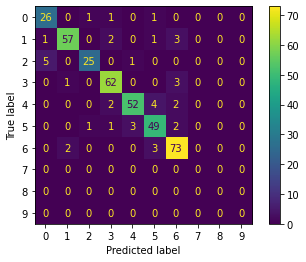

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = metrics.confusion_matrix([int(x) for x in y_trues], [x.item() for x in y_preds], labels=[x for x in range(10)])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
!cp -r "/content/vit-signal-processing-noimgnet/checkpoint-385" /content/drive/MyDrive/model_signal

cp: cannot stat '/content/vit-signal-processing-noimgnet/checkpoint-385': No such file or directory


In [ ]:
!zip -r "checkpoint-16488.zip" "vit-digit-recognition/checkpoint-16488"

	zip warning: name not matched: vit-digit-recognition/checkpoint-16488

zip error: Nothing to do! (try: zip -r checkpoint-16488.zip . -i vit-digit-recognition/checkpoint-16488)


# Get Results
The test files can have many digits in one photo, so we first crop these according to the bounding boxes given.

In [ ]:
test_images = glob.glob("/content/drive/MyDrive/SuperAI/Signal/image_heatmap/Test/*")
test_images

In [44]:
from PIL import Image, ImageOps
import torch

answers_final = dict()
size_image = 720
with torch.no_grad():
    for img_id, image_path in enumerate(test_images):
        key = image_path.split("/")[-1]

        img = Image.open(image_path)
        
        # Transform those images
        image = ImageOps.contain(img, (size_image, size_image), Image.Resampling.LANCZOS).convert("RGB")
        image = ImageOps.autocontrast(image)
        image = ImageOps.pad(image, (size_image, size_image), centering=(0, 0))

        encoding = feature_extractor(image, return_tensors="pt").to("cuda")
        outputs = model(**encoding)
        pred = outputs.logits.argmax(-1).item()
        answers_final[f"{key.split('.')[0]}"] = model.config.id2label[str(pred)]

answers_final

{'30de3513-93ff-42d8-ad5f-4c93f4a4444c': '6',
 '84e55af1-ae63-4b06-b650-1136d38b691e': '6',
 '2471a7eb-af35-4ae7-870e-6650de9f0c2f': '6',
 'd00e8bdc-79af-4e55-b25a-96ea589b6420': '4',
 'ad9f77bc-5ab6-477d-b760-2f3fc65c14d3': '0',
 '7c437205-adc7-410c-906e-3c79421e6170': '3',
 '5f5966ac-dc5f-40ad-8272-7c652eb2b16a': '6',
 '17445f56-bd54-43f0-9560-db427817b8e6': '0',
 '964384cb-c075-4423-a7d5-4316c7e58394': '2',
 'a4f6b08c-32c7-454d-a6af-55f98dbee427': '6',
 'd2de8fc8-f4b0-4dc5-8c42-0bd92f1e46ae': '6',
 '96dc5573-6184-409f-9981-5b480cfe9889': '5',
 'fe3f7fa2-5dca-4535-9cfe-138d934e83cf': '6',
 'dc4c1a72-7706-41e1-adb8-34a5b342779b': '6',
 '1bd08fdf-f0cf-4027-a6cd-213269872e2a': '6',
 '893c2516-d8e7-4d41-a0ea-a1c0bb921492': '5',
 'fb1a379f-92c8-467c-915d-f0c59482e99e': '6',
 'e7e79485-e907-4310-b65c-3470106581bd': '3',
 '23811759-e95d-4714-8599-3864f34c4eda': '4',
 '5d94abf7-e4ac-42d0-9171-7aff65b383ea': '6',
 '7a84300f-c4b2-41ad-9e6f-511ca5c22d68': '6',
 '5d6553fd-c8c8-480c-92d6-13a00888

In [45]:
with open("solution_vit_no_pretrained_dataResearch.csv", "w") as f:
    f.write("id,class\n")
    for name in answers_final:
        f.write(f"{name},{answers_final[name]}\n")